***

# Calcul Matriciel
## TP2. Graphs isomorphism for dummies
***
***

Basics on graph isomorphism and graph info via adjacency matrices
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

**_In this pratical, we will only deal with non-oriented graphs. It can be however interesting to notice what would work or fail in the oriented setting_**


The aim of this practical is to extract from theadjacency matrix basic infos (order,size,degrees,radius,diameter, ...).


***
## <font color=blue>Some adjacency matrices examples and function already defined</font> ##
***

**To Do:**

**_question 1_**

Create (again) a numpy array `B` representing the adjacency matrix of the Bull graph (cf CM1 and TP1).


Copy the function  `complet(n)` returning the adjacency matrix of the complete graph on $n$ vertices and  ` wheel(n)` returning the adjacency matrix of the wheel graph on $n+1$ vertices from TP1 

In [15]:

B=np.array(
[[0,1,0,0,0], 
[1,0,1,1,0], 
[0,1,0,1,0], 
[0,1,1,0,1],
[0,0,0,1,0]])



In [16]:
def complete(n):
    """
     Returns the adjacency matrix of a complete graph with n vertices

    :param n: nomber of vertices
    :type n:  int
    :return: adjacency matrix of a complete graph with n vertices
    :rtype: 2D numpy array of int
    """
    A=np.ones((n,n))
    for i in range(n):
        A[i][i]=0
    return A



def wheel(n):
    """
     Returns the adjacency matrix of a wheel graph with n+1 vertices

    :param n: nomber of vertices
    :type n:  int
    :return: adjacency matrix of a wheel graph with n+1 vertices
    :rtype: 2D numpy array of int
    """
    A=np.zeros((n+1,n+1))
    for i in range(1,n):
        A[i][i+1]=1
        A[i+1][i]=1
        A[0][i]=1
        A[i][0]=1
    A[0][n]=1
    A[n][0]=1
    A[1][n]=1
    A[n][1]=1
    return A

wheel(5)

array([[0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0.]])

**_question 2_**

Copy the function `̀Info` from TP1

In [17]:
def info(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the number of vertices (int), the number of edges (int) and a list of degree (table of int)
    :rtype: int, int, table of int
    """
    n=A.shape[0]
    #print("number of vertices:",A.shape[0])
    AA=np.dot(A,A)
    #print("number of edges:",int(np.trace(AA)/2))
    d=A@np.ones(n,dtype=int)
    #print("degree list:",d)
    return [n,int(np.trace(AA)/2),d]
    
A=np.array([[0 , 1 , 0 , 0 , 0 ],[1 , 0 , 1 , 1 , 0 ],[0 , 1 , 0 , 1 , 0 ],[0 , 1 , 1 , 0 , 1 ],[0 , 0 , 0 , 1 , 0]])
info(A)
    

[5, 5, array([1, 3, 2, 3, 1])]


***
## <font color=blue>Eccentricity, radius, diameter</font> ##
***

We recall that, if $A$ is the adjacency matrix of a graph $G$, then $A^\ell_{i,j} = \mathbf{e_j}^TA^\ell\mathbf{e_i}$ is number of path of length exactly $\ell$ between $i$ and $j$.

**To Do:**

**_question 1_**

How do you know if there is a path of length <u>a most $\ell$</u> in G?

Deduce a function computing the excentricity of a node $s \in G$.

In [18]:
S=np.eye(5)
for i in range(4):
    print(S,i)
    S=S+S@A

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 0
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1.]] 1
[[2. 2. 1. 1. 0.]
 [2. 4. 3. 3. 1.]
 [1. 3. 3. 3. 1.]
 [1. 3. 3. 4. 2.]
 [0. 1. 1. 2. 2.]] 2
[[ 4.  6.  4.  4.  1.]
 [ 6. 12. 10. 11.  4.]
 [ 4. 10.  9. 10.  4.]
 [ 4. 11. 10. 12.  6.]
 [ 1.  4.  4.  6.  4.]] 3


In [19]:
def excentricity(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the list of eccentricities (list of int), the diameted (int) and the radius (int)
    :rtype: array of int,int, int,
    """
    n=A.shape[0]
    exc=np.ones(n,int)*-1
    l=0
    P=np.eye(n) #A raised to the power l
    S=np.eye(n) #cumulated sum_{i=0}^l A^i
    while l<=n and (-1 in exc):
        l=l+1
        P=P@A
        S=S+P
        print(l)
        for i in range(n):
            if exc[i]==-1:
                if not(0 in S[i]):
                    exc[i]=l

    if l==n:
        for i in range(n):
            if exc[i]==-1:
                exc[i]=np.inf
    return[exc,max(exc),min(exc)]

print(f"{excentricity(B) = }") 

1
2
3
excentricity(B) = [array([3, 2, 2, 2, 3]), 3, 2]


**_question 1 bis_**

What happens if a graph is not connected? Fix this issue.

**To Do:**
In this question, we start by assuming that the graph is _**directed**_.


**_question 2 preliminaries_**

Create the adjacency matrix of the digraph of CM1 slide 11. 

**_question 2_**

In this setting, write a function computing the size of the shortest cycle a node $s$ belongs to. 

In [20]:
Gri=np.array([
    [0,0,0,0,1],
    [1,0,1,0,0],
    [1,0,0,1,0],
    [0,1,0,0,1],
    [1,0,0,0,1]
])


def girth(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the list of shortest cycles (list of int), the girth (int)
    :rtype: array of int,int
    """
    n=A.shape[0]
    loop=np.ones(n,int)*-1
    P=A
    l=1
    while l<=n and (-1 in loop):
        print(l)
        for i in range(n):
            if loop[i]==-1:
                if P[i,i]>0:
                    loop[i]=l
        l=l+1
        P=P@A
    return[loop,min(loop)]

girth(Gri)

1
2
3


[array([2, 3, 3, 3, 1]), 1]

**_question 2 bis_**

What happens if a graph is not connected? Fix this issue.

**question 3**
Does your algorithm work for undirected graphs? Give a counterexample

**question bonus**
Show that we can compute the girth $\pm 1$ of an undirected graph using this method. _hint: what happens for cycles of even/odd lengths?_

__________________________


***
## <font color=blue>Computing isomorphisms</font> ##
***
In this part, we are going to compute ((very) naively) whether 2 graphs are isomorphic.


In order to do so, we are going to apply the (extremely) naive algorithm


<tt> areIsomorphicGraph(A,B)
    
for all permutations p
    
    if p(A) = B
    
       return True
    
return False
</tt>


It is easy to implement the permutation for a matrix: given a permutation $\sigma \in S_n, (P_\sigma)_{i,j} = \begin{cases}1 \text{ if } \sigma(j) = i \\ 0 \text{ otherwise }\end{cases} $.

Then $\sigma(A) = P.A.P^{-1}$


see also https://en.wikipedia.org/wiki/Permutation_matrix

**To Do:**

**_question 1 preliminaries_**

Get familiar with permutations and itertools

In [21]:
from itertools import permutations

perm = list(permutations(np.arange(5)))

perm[1]


(0, 1, 2, 4, 3)

**_question 1_**


Given a permutation $\sigma \in S_n$, compute the associated permutation matrix $P_\sigma$

In [22]:
def permMat(sigma):
    n=len(list(sigma))
    P=np.zeros((n,n),int)
    for i in range(n):
        for j in range(n):
            P[i,j]=int(sigma[j]==i)
            
    return P

permMat(perm[1])

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

*****
**To Do:**


**_question 2 preliminaries_**

Create a few examples of isomorphic and non isomorphic graphs (adjacency matrices).

Share them with your classmates


*****
**To Do:**


**_question 2_**

Write down the naive algorithm described above

In [23]:
def areIsomorphicGraph(A,B):
    """

    """    
    n,m,d=info(A)
    nn,mm,dd=info(B)
    
    if n!=nn or m!=mm or not(np.alltrue(np.sort(d)==np.sort(dd))):
    
        return False
    
    else:
        perm = list(permutations(np.arange(n)))

        for p in perm:
            P=permMat(p)
            if np.all((np.equal(B,P@A@np.linalg.inv(P)))):
                return p
        
    return False

areIsomorphicGraph(A,A)

(0, 1, 2, 3, 4)

_**question 2 bis**_

What is the complexity of this algorithm?

_______________________



***
## <font color=blue>Generating and counting graphs</font> ##
***

The aim of this last part is to create tools to test our isomorphism algorithms.


One possible way of generating all graphs of size $n$ is to add a vertex in all possible ways from all graphs of size $n-1$.

**_question 1_**

Write a function generating all (undirected, simple) graphs.


Draw theses graphs for $n\leq 4$

_(hint): counting in binary might come handy_

In [24]:
# Convert an integer to a binary string using a custom function
def int_to_binary(integer,length):
    binary_array =[]
    while(integer > 0):
        digit = integer % 2
        binary_array.append(digit)
        integer = integer // 2
    binary_array = binary_array[::-1]
    while len(binary_array)<length:
        binary_array.insert(0,0)
    return np.array(binary_array)

print(int_to_binary(1,4))

def allGraphs(n):
    """
    
    """
    if n==1:
        graphs=[np.array([[0]])]
    else :
        graphs=[]
        graphs_s=allGraphs(n-1)
        for graph in graphs_s : 
            for edges in range(2**(n-1)):
                edges_list=int_to_binary(edges,n)
                adj=np.zeros((n,n))
                adj[1:,1:]=graph
                adj[0]=edges_list
                adj[:,0]=edges_list
                graphs.append(adj)
    return graphs



allGraphs(3)

[0 0 0 1]


[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 1., 1.],
        [1., 0., 0.],
        [1., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [1., 1., 0.]]),
 array([[0., 1., 0.],
        [1., 0., 1.],
        [0., 1., 0.]]),
 array([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])]

........

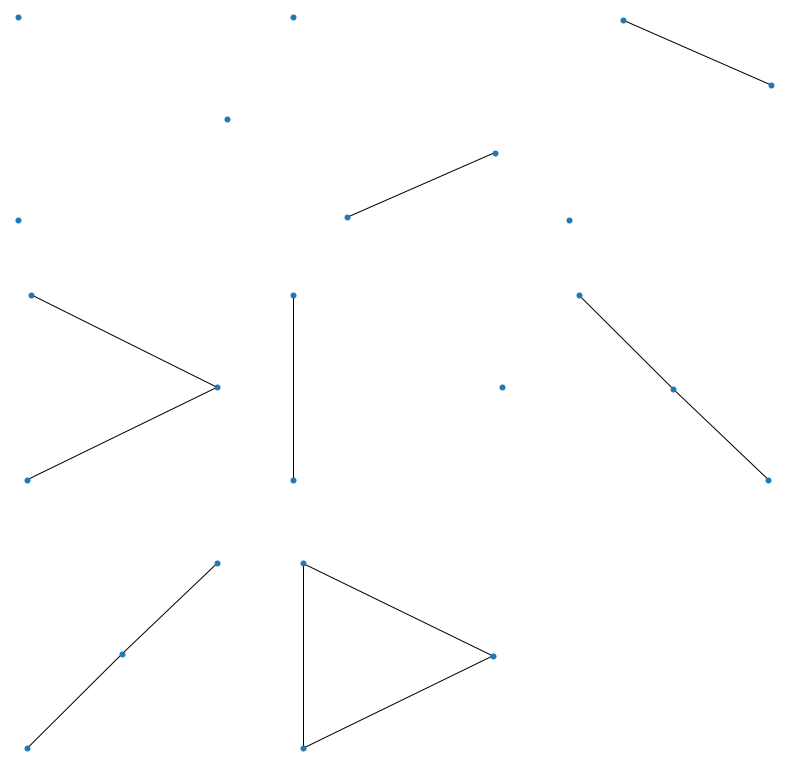

In [25]:

#adapted from https://matplotlib.org/matplotblog/posts/draw-all-graphs-of-n-nodes/
def plot_graphs(graphs, figsize=14, dotsize=25):
    """Utility to plot a lot of graphs from an array of graphs. 
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        nx.draw_kamada_kawai(nx.from_numpy_array(graphs[i]), node_size=dotsize)
        print('.', end='')
        
        
plot_graphs(allGraphs(3))

**_question bonus_**

Write a function generating all (undirected, simple) graphs by deleting (in a clever order) edges from the complete graph 

**_question 2_**

Write a (still naive) function generating all (undirected, simple) non-isomorphic graphs.

_(hint) the number of non-isomorphic undirected simple graph is given by https://oeis.org/A000088. See also https://networkx.org/documentation/stable/reference/generated/networkx.generators.atlas.graph_atlas_g.html#networkx.generators.atlas.graph_atlas_g




In [26]:
def allNonIsoGraphs(n):
    graphes=allGraphs(n)
    
    nonIso=[graphes[0]]
    
    for graphA in graphes:
        flag=True
        for graphB in nonIso:
            if not(areIsomorphicGraph(graphA,graphB)==False):
                flag=False
        if flag:
            nonIso.append(graphA)
            
    return nonIso


len(allNonIsoGraphs(3))

4

...........

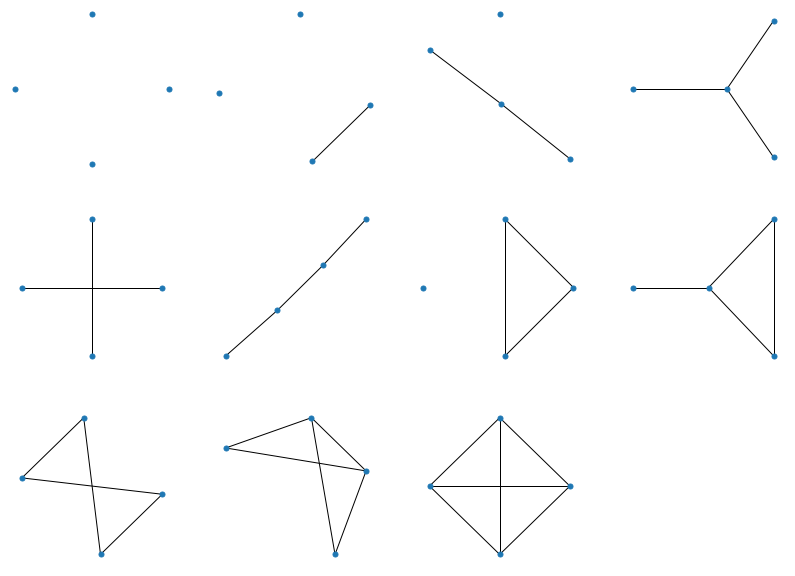

In [29]:
plot_graphs(allNonIsoGraphs((4)))

**_question bonus_**
Evaluate the performances of your algorithm.
